<a href="https://colab.research.google.com/github/ghziirmdhn/Implementasi-Interpolasi-/blob/main/Implementasi-Interpolasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Lagrange Interpolation Values:
Lagrange(10) = 30.0
Lagrange(20) = 40.0
Lagrange(30) = 20.0
Sample Newton Interpolation Values:
Newton(10) = 30.0
Newton(20) = 40.0
Newton(30) = 20.0


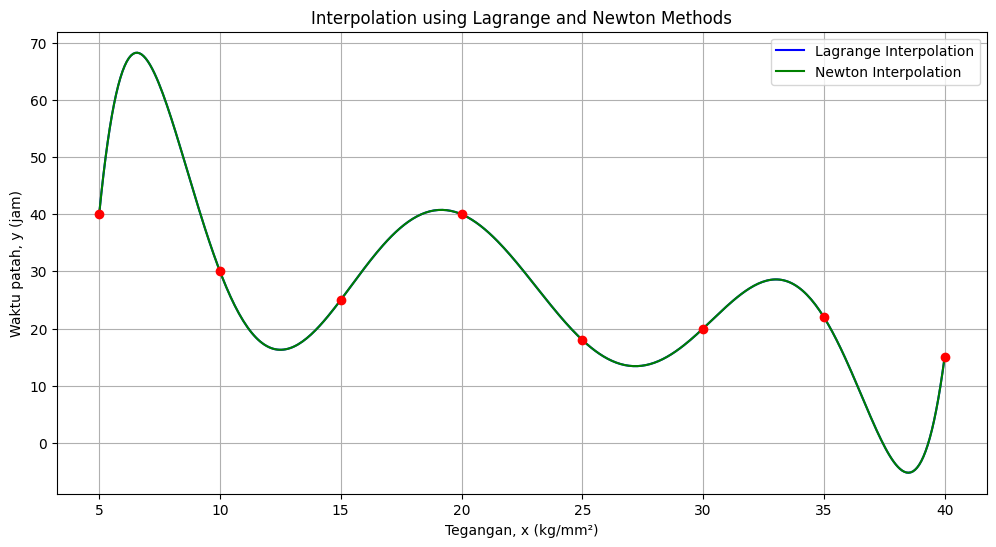

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Data yang diberikan
x_values = np.array([5, 10, 15, 20, 25, 30, 35, 40])
y_values = np.array([40, 30, 25, 40, 18, 20, 22, 15])

# Fungsi Interpolasi Polinomial Lagrange
def lagrange_interpolation(x, x_points, y_points):
    def basis_polynomial(k, x):
        result = 1
        for j in range(len(x_points)):
            if j != k:
                result *= (x - x_points[j]) / (x_points[k] - x_points[j])
        return result

    interpolation_result = 0
    for k in range(len(x_points)):
        interpolation_result += y_points[k] * basis_polynomial(k, x)
    return interpolation_result

# Fungsi Interpolasi Polinomial Newton
def newton_interpolation(x, x_points, y_points):
    n = len(x_points)
    coef = np.zeros([n, n])
    coef[:, 0] = y_points

    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i + 1, j - 1] - coef[i, j - 1]) / (x_points[i + j] - x_points[i])

    def newton_basis(x, x_points, k):
        result = 1
        for i in range(k):
            result *= (x - x_points[i])
        return result

    interpolation_result = 0
    for k in range(n):
        interpolation_result += coef[0, k] * newton_basis(x, x_points, k)
    return interpolation_result

# Membuat plot
x_plot = np.linspace(5, 40, 400)
y_lagrange = np.array([lagrange_interpolation(x, x_values, y_values) for x in x_plot])
y_newton = np.array([newton_interpolation(x, x_values, y_values) for x in x_plot])

print("Sample Lagrange Interpolation Values:")
for x in [10, 20, 30]:
    print(f"Lagrange({x}) = {lagrange_interpolation(x, x_values, y_values)}")

print("Sample Newton Interpolation Values:")
for x in [10, 20, 30]:
    print(f"Newton({x}) = {newton_interpolation(x, x_values, y_values)}")

plt.figure(figsize=(12, 6))
plt.plot(x_plot, y_lagrange, label='Lagrange Interpolation', color='blue')
plt.plot(x_plot, y_newton, label='Newton Interpolation', color='green')
plt.scatter(x_values, y_values, color='red', zorder=5)
plt.title('Interpolation using Lagrange and Newton Methods')
plt.xlabel('Tegangan, x (kg/mm²)')
plt.ylabel('Waktu patah, y (jam)')
plt.legend()
plt.grid(True)
plt.show()
